# NEURAL NETWORKS AND DEEP LEARNING

---
A.A. 2021/22 (6 CFU) - Dr. Alberto Testolin, Dr. Umberto Michieli
---


## Lab. 02 - Introduction to PyTorch

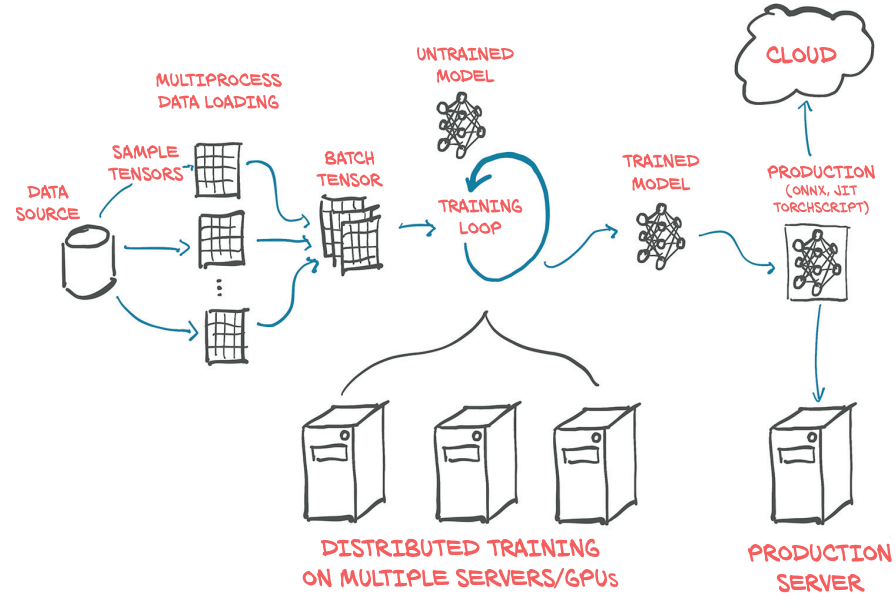

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

# Tensors

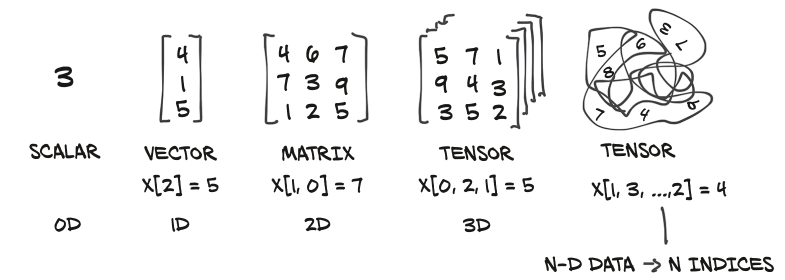

Tensors are the main object to represent data and interact with the PyTorch library. They are similar to NumPy’s arrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.


In [ ]:
x = torch.tensor([1, 2, 3])
print(x)
print(x.type())

The data type is inferred automatically, but it is always a good practice to ensure that the data type is what expected.

In [ ]:
x = torch.tensor([1, 2, 3]).float()
print(x)
print(x.type())

Most methods are similar to the numpy equivalent. For example:

In [ ]:
x = torch.rand(4, 5)
print(x)

In [ ]:
x = torch.zeros(4, 5).long()
print(x)

In [ ]:
x = torch.ones(4, 5).double()
print(x)

In [ ]:
a = torch.rand(3, 4)
b = torch.rand(3, 4)

c = torch.add(a, b)
print(c)

# Numpy bridge

It is very easy to convert a numpy array to a tensor and vice-versa.

In [ ]:
# Define a numpy array
np_x = np.array([1,2,3,4,5], dtype=np.float32)
print(np_x)

In [ ]:
# Convert to torch tensor
torch_x = torch.from_numpy(np_x)
print(torch_x)
#or
torch_x = torch.tensor(np_x)
print(torch_x)

In [ ]:
# Go back to numpy
np_x2 = torch_x.numpy()
print(np_x2)

# Operations on GPU

One of the biggest benefit of PyTorch is that you can perform operations on GPU without changing the code.

- The following code first check if a GPU is available.
- If available, move the tensors *a* and *b* to the GPU memory.
- The sum is performed on GPU, if available, otherwise on CPU, but the result will be exactly the same.

In [ ]:
a = torch.rand(3, 4)
b = torch.rand(3, 4)

# Check if a cuda GPU is available
if torch.cuda.is_available():
    print('GPU available')
    # Define the device (here you can select which GPU to use if more than 1)
    device = torch.device("cuda")
    # Move previous a and b tensors to the GPU
    a = a.to(device)
    b = b.to(device)
else:
    print('GPU not available')

# The operation on a and b will be executed on GPU, if available
c = a + b
# Move the result tensor back to CPU
c = c.cpu()
print(c)

# Autograd

PyTorch is able to automatically compute gradients on tensors that have been defined with the *requires_grad* flag. There's no need to say how much this is important for deep learning!

But this functionality can be actually used for any gradient, even simple equations like $z = 3 x^2 + y^3$

Let's try with $x=2$ and $y=3$

In [ ]:
# Define operations
x = torch.tensor([2.0], requires_grad=True).float()
y = torch.tensor([3.0], requires_grad=True).float()
z = 3 * x**2 + y**3
# Backward
z.backward()
# Print gradients
print('dz/dx evaluated in %f: %f' % (x, x.grad)) # dz/dx = 6 * x = 12
print('dz/dy evaluated in %f: %f' % (y, y.grad)) # dz/dy = 3 * y^2 = 27

The result is correct, in fact:

$$
z = 3 x^2 + y^3\\
\frac{dz}{dx} = 6 x = 12\\
\frac{dz}{dy} = 3 y^2 = 27
$$


This also works for chained operations:
# Task:
Implement the function 
$$f(g(x))$$ with $$g(x) = 3x^2, f(y) = 2y^2$$

In [ ]:
# Define operations
x = torch.tensor([2.0], requires_grad=True).float()
##################
#PUT YOUR CODE HERE
y = None
z = None
#################
print('NOTE: Gradient before the backward pass is not computed! x.grad =', x.grad)
##################
#PUT YOUR CODE HERE
#backward step
None
##################
# Print gradients
print('dz/dx evaluated in %f: %f' % (x, x.grad)) 
# dz/dx =
# = (dz/dy) * (dy/dx) = 
# = (4*y) * (6*x)  = 
# = (4*3*x^2) * (6*x) =
# = 72 * x^3
print(f"Correct value: {72 * 2**3}")

Useful deep learning functions are already implemented. Let's try with a sigmoid and its derivative.

In [ ]:
x = torch.linspace(-10, 10, 1000, requires_grad=True)
y = torch.sigmoid(x)
print(y.size())
#y.backward() # ERROR: can evaluate gradients only on scalar values
y.sum().backward()

plt.plot(x.data.numpy(), y.data.numpy(), label='sigmoid')
plt.plot(x.data.numpy(), x.grad.numpy(), label='derivative of sigmoid')
plt.legend()

# Network training procedure

## Network Definition

A network is defined by extending the *torch.nn.Module* class. The basic structure is:

```
class Net(nn.Module):
    
    def __init__(self, input_parameters):
        super().__init__() # This executes the parent __init__ method
        [...]

    def forward(self, x, optional_parameters):
        [...]
        return out # return the output of the network
```

You need to define two methods:
*   **\_\_init\_\_**: The constructor method. This is exectuted when the object is initialized (no need to call it explicitly). Here you have to instantiate all the network's parameters. PyTorch provides utility functions to easily initialize most of the commonly used deep learning layers.
*   **forward**: Here you define the forward pass of the network, from the input *x* to the output (the method must return the network output). You just need to define the forward part, the back-propagation is automatically tracked by the framework!

Let's try with a simple single layer feed-forward network. A fully connected layer is initialized with the utility method *torch.nn.Linear*. **Keep in mind that the activation function is not included!**

Here you can find all the available layers: [https://pytorch.org/docs/stable/nn.html](https://pytorch.org/docs/stable/nn.html)

In [ ]:
class Net(nn.Module):
    
    def __init__(self, Ni, Nh, No):
        """
        Ni - Input size
        Nh - Neurons in the hidden layer
        No - Output size
        """
        super().__init__()
        
        print('Network initialized')
        self.fc1 = nn.Linear(in_features=Ni, out_features=Nh)
        self.out = nn.Linear(in_features=Nh, out_features=No)
        self.act = nn.Sigmoid()
        
    def forward(self, x):
        x = self.act(self.fc1(x))
        x = self.out(x)
        return x

## Network Initialization

Now we can initialize the network



---

*HINT*

For reproducibility, it is always recommended to set a manual seed. In this way the randomly initialized network's parameters will be always the same. Try to disable it to see how the initialized weights change every time you redefine the network object.


In [ ]:
# Network parameters
Ni = 1
Nh = 32
No = 1

torch.manual_seed(0)
net = Net(Ni, Nh, No)

As you can see from the *print* output, the *\_\_init\_\_* method has been executed.

You can see the network structure using the *print* function:

In [ ]:
print(net)

You can easily access the parameter values:

Documetation:

* [nn.Module.parameters](https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=parameters#torch.nn.Module.parameters)
* [nn.Module.named_parameters](https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=named_param#torch.nn.Module.named_parameters)

---
*HINTS*

Check the documentation to see how pyTorch initialize the parameters. This clearly depends on the layer's type.

In [ ]:
for param_name, param_values in net.named_parameters():
    param_values = param_values.detach().numpy() # Transform to numpy array, if needed
    print("\n####################################")
    print("####################################")
    print(f"#### PARAMETER NAME: {param_name}")
    print("####################################")
    print(f"#### PARAMETER SHAPE: {param_values.shape}")
    print(f"#### PARAMETER VALUES: {param_values}")

In this case we have just 32 biases and 32 weights for the hidden layer and 32 weights and 1 bias for the output layer.

## Process input

Let's define a batch of 128 random input values.

Since we have a single input neuron, the input shape is (128, 1).

In [ ]:
x = torch.rand(128, 1)

Processing the input is very simple, just call the network object with the data. PyTorch will call the forward function internally and automatically track the gradients.

In [ ]:
out = net(x)
print(f"OUTPUT VALUES: {out}")
print(f"OUTPUT SHAPE: {out.shape}")

### Disabling gradient tracking

PyTorch tracks gradients by default (it does not know if you are training or testing). During testing, it is always recommended to disable the backpropagation to speed-up the computation. This can be easily achieved with this command:

In [ ]:
with torch.no_grad():
    out = net(x)

print(f"OUTPUT SHAPE: {out.shape}")

### Run on GPU

To run the computation on GPU you need to:

*   Transfer the network parameters to the GPU memory
*   Transfer the input data to the GPU memory
*   If needed, transfer back the output to the CPU memory


In [ ]:
### Check if a cuda GPU is available
if torch.cuda.is_available():
    print('GPU availble')
    # Define the device (here you can select which GPU to use if more than 1)
    device = torch.device("cuda")
else:
    print('GPU not availble')
    device = torch.device("cpu")

print(f"SELECTED DEVICE: {device}")

### Transfer the network parameters to the GPU memory (if available)
net.to(device)

### Transfer the input data to the GPU memory (if available) and compute output
out = net(x.to(device))

print(f"OUTPUT SHAPE: {out.shape}")

## Compute the loss

PyTorch already implements all the loss functions commonly used in any machine learning and deep learning problems, both for regression and classification.

Here the complete list of the available loss functions: [loss-functions](https://pytorch.org/docs/stable/nn.html#loss-functions)

Check the documentation for all the available parameters, which clearly depend on the specific loss.

Let's define an MSELoss (with default parameters) as example:


In [ ]:
# Define the loss function
loss_function = nn.MSELoss()

# Evaluate the loss function
a = torch.rand(100)
b = torch.rand(100)
loss_value = loss_function(a, b)
print(f"Computed loss: {loss_value}")

expected_mse = np.mean((b.numpy()-a.numpy())**2)
print(f"Expected MSE: {expected_mse}")

## Backpropagation

Since PyTorch automatically tracks the gradients, the backpropagation step can be done is a single line of code by calling the *.backward()* method of the loss tensor.

Before that, you need to be sure that there are no gradients accumulated by previous operations by calling the method *.zero_grad()* of the network object.

Let's try with some random input and labels.

In [ ]:
x = torch.rand(128, 1).to(device)
label = torch.rand(128, 1).to(device)

# Forward pass
out = net(x)

# Compute loss
loss = loss_function(out, label)

# Backpropagation
net.zero_grad()
loss.backward()

Let's check the just evaluated gradients, for example on the parameters of the first layer.

In [ ]:
params = next(net.fc1.parameters())
print("#########################")
print("#########################")
print(f"VALUES")
print("#########################")
print(params)

print("\n#########################")
print("#########################")
print(f"GRADIENTS")
print("#########################")
print(params.grad)

## Update the weights (Optimizer)

Now that we have the gradients, we can also manually implement the simplest gradient descent just by multiplying the gradients by a learning rate, and then add this contribution to the original weights.

However, PyTorch already implements much more complex approaches which also consider higher order momentum and other improvements for a better optimization.

You can find all the available optimizers in the *torch.nn.optim module*. Check the documentation here: [optim](https://pytorch.org/docs/stable/optim.html)


For example, let's use the Adaptive Moment (Adam) algorithm.

[Adam paper](https://arxiv.org/abs/1412.6980)

In [ ]:
# Random training data
x = torch.rand(128, 1).to(device)
label = torch.rand(128, 1).to(device)

# Define the loss function
loss_function = nn.MSELoss()

# Define the optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

#################
# PUT YOUR CODE HERE
# Forward pass
out = None

# Compute loss
loss = None
#################
# Backpropagation
net.zero_grad()
loss.backward()

# Update the weights
print(f"A specific weight before update: {next(net.fc1.parameters())[0]}")
optimizer.step()
print(f"A specific weight after update: {next(net.fc1.parameters())[0]}")

ùAs you can see from the print outputs, the optimizer successfully updated the weight.

The *.step()* method of the optimizer is where the optimizer actually update the weights.

When you define the optimizer, you have to provide:

* The parameters that the optimizer should update during the update step (in this case all the network parameters, but it can also be a subset for more complex network implementations).
* Additional parameters that depend on the specific optimizier. In this case we are just providing a learning rate.

# Dataset and Dataloader

## The Dataset class

`torch.utils.data.Dataset` is an abstract class representing a dataset. Your custom dataset should inherit `Dataset` and override the following methods:

* `__init__` to initialize your dataset. For example, if your dataset fits in memory, you can load the entire dataset in a list, or you can just store the list of dataset files.
* `__len__` so that len(dataset) returns the size of the dataset.
* `__getitem__` to support indexing such that `dataset[i]` can be used to get  the i-th sample

Therefore, the structure of the class is:

```
class CustomDataset(Dataset):

    def __init__(self, init_parameters, transform=None):
        self.transform = transform
        [...]

    def __len__(self):
        [...]

    def __getitem__(self, idx):
        [...]
        if self.transform:
            sample = self.transform(sample)

        return sample
```

Typically, a `transform` function is provided during initialization. This function is applied to each sample at runtime, so it is executed every time you load a sample from the dataset. This is really helpful, for example, to add random data transformation during training, such as random image rotation, random noise... (this procedure is called data augmentation)

Let's create a `Dataset` class that loads data from a csv file with two columns, the first is the input (single value), and the second is the output (label).

First, we create some example files. We generate data using the same quadratic function used in the previous lab.


---

*HINT*

You can use the `pandas` package to deal with csv files and easily map them into pandas `DataFrame` objects.

* [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
* [pandas.DataFrame.to_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html?highlight=to_csv#pandas.DataFrame.to_csv)

In [ ]:
def poly_model(x, beta, noise_std=0):
    """
    INPUT
        x: x vector
        beta: polynomial parameters
        noise_std: enable noisy sampling (gaussian noise, zero mean, noise_std std)
    """
    pol_order = len(beta)
    x_matrix = np.array([x**i for i in range(pol_order)]).transpose()
    y = np.matmul(x_matrix, beta)
    noise = np.random.randn(len(y)) * noise_std
    return y + noise

beta_true = [-1.45, 1.12, 2.3]
noise_std = 0.2
np.random.seed(4)

### Train data
num_train_points = 20
x_train = np.random.rand(num_train_points)
y_train = poly_model(x_train, beta_true, noise_std)
with open('train_data.csv', 'w') as f:
    data = [f"{x},{y}" for x, y in zip(x_train, y_train)]
    f.write('\n'.join(data))
    
### Test data
num_test_points = 20
x_test = np.random.rand(num_test_points)
y_test = poly_model(x_test, beta_true, noise_std)
with open('test_data.csv', 'w') as f:
    data = [f"{x},{y}" for x, y in zip(x_test, y_test)]
    f.write('\n'.join(data))


### Plot
plt.figure(figsize=(12,8))
x_highres = np.linspace(0,1,1000)
plt.plot(x_highres, poly_model(x_highres, beta_true), color='b', ls='--', label='True data model')
plt.plot(x_train, y_train, color='r', ls='', marker='.', label='Train data points')
plt.plot(x_test, y_test, color='g', ls='', marker='.', label='Test data points')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

Now we can define our `Dataset` class.

In [ ]:
class CsvDataset(Dataset):

    def __init__(self, csv_file, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.transform = transform
        # Read the file and split the lines in a list
        with open(csv_file, 'r') as f:
            lines = f.read().split('\n')
        # Get x and y values from each line and append to self.data
        self.data = []
        for line in lines:
            sample = line.split(',')
            self.data.append((float(sample[0]), float(sample[1])))
        # Now self.data contains all our dataset.
        # Each element of the list self.data is a tuple: (input, output)

    def __len__(self):
        # The length of the dataset is simply the length of the self.data list
        return len(self.data)

    def __getitem__(self, idx):
        # Our sample is the element idx of the list self.data
        sample = self.data[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample

Now we can instantiate our training and test dataset objects.

In [ ]:
train_dataset = CsvDataset('train_data.csv')
test_dataset = CsvDataset('test_data.csv')

We can directly get data from the `Dataset` object in the same way we do with lists.

In [ ]:
# Direct access (element at index 3, i.e. 4th element, go check the 4th line in the csv file)
print(train_dataset[3])

In [ ]:
# Iterate the entire dataset
for sample in train_dataset:
    print(sample)

## Data transformation

Now that we have a dataset to work with, we can move to creating custom transformations. A suite of transformations used at training time is typically referred to as data augmentation and is a common practice for modern model development.

One issue common in handling computer vision datasets, for example, is that the samples may not all be the same size. Most neural networks expect the images of a fixed size. Therefore, you will need to write some prepocessing code to rescale and/or crop the image. 

You can find more details here: [https://pytorch.org/tutorials/recipes/recipes/custom_dataset_transforms_loader.html](https://pytorch.org/tutorials/recipes/recipes/custom_dataset_transforms_loader.html)

In this case we just need to transform our data points into PyTorch **float32** tensors.

To do so we write **callable class** instead of simple functions so that parameters of the transform do not need to be passed everytime it’s called. 

For this, we just need to implement `__call__` method and if required, `__init__` method. We can then use a transform like this:

```
tsfm = Transform(params)
transformed_sample = tsfm(sample)
```

In [ ]:
class ToTensor(object):
    """Convert sample to Tensors."""

    def __call__(self, sample):
        x, y = sample
        return (torch.Tensor([x]).float(),
                torch.Tensor([y]).float())

Let's check if it works with a custom sample.

In [ ]:
to_tensor = ToTensor()
sample = (2.3, 3.5)
print(to_tensor(sample))

You can concatenate multiple transformations (e.g. rescale image -> crop image -> add random noise -> tranform to tensor), using the utility function `torchvision.transforms`. In this case we have just a single tranform, but we use it anyway.

In [ ]:
composed_transform = transforms.Compose([
  ToTensor(),
  # Other transformations, if required
  ])

In [ ]:
# Test the composed transform
sample = (2.3, 3.5)
print(composed_transform(sample))

To include the transformation in the previous defined dataset every time we get a sample, we can use the transform parameter of the dataset:

In [ ]:
train_dataset = CsvDataset('train_data.csv', transform=composed_transform)
print(train_dataset[0])

As you can see, now the dataset returns tensor data.

### Exercise

Create a composed transform that:

1.   Convert sample to tensors
2.   Add a random noise (zero mean and configurable std) to the x value of the sample

In [ ]:
class AddNoise(object):
    """Add random noise to sample."""

    #########
    # DEFINE THE CONSTRUCTOR HERE
    #########

    def __call__(self, sample):
        ###################################
        # PUT YOUR CODE HERE
        x, y = None
        noise = None
        ###################################
        return (x + noise, y)

In [ ]:
# Create the composed transform
composed_transform = transforms.Compose([
##############################
#PUT THE ToTensor AND YOUR TRANSFORM IN HERE
####
])

In [ ]:
# Test the composed transform
sample = (2.3, 3.5)
print(composed_transform(sample))

## Dataloader

Creating a `Dataset` class may seem unnecessary for the most basic problems. But it really helps when the dataset and the training procedure start to get more complex.

One of the most useful benefit of defining a `Dataset` class is the possiblity to use the PyTorch `Dataloader` module.

By operating on the dataset directly, we are losing out on a lot of features by using a simple for loop to iterate over the data. In particular, we are missing out on:

* Batching the data
* Shuffling the data
* Load the data in parallel using multiprocessing workers.

`torch.utils.data.DataLoader` is an iterator which provides all these features. Parameters used below should be clear.

In [ ]:
nw=0
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=nw)

for i_batch, sample_batched in enumerate(train_dataloader):
    print('#################')
    print(f'# BATCH {i_batch}')
    print('#################')
    x_batch = sample_batched[0]
    label_batch = sample_batched[1]
    print(f"INPUT DATA (shape: {x_batch.shape})")
    print(x_batch)
    print(f"LABELS (shape: {label_batch.shape})")
    print(label_batch)

It automatically created batches, shuffled the data and loaded the samples simultaneously from nw parallel processes!

## (Optional) Skorch 

A scikit-learn compatible neural network library that wraps PyTorch.
Skorch is designed to maximize interoperability between sklearn and PyTorch. 


We use *NeuralNetRegressor* because we're dealing with a regression task (similarly there exists a *NeuralNetClassifier* for a classification task). The first argument should be the *pytorch module*. As additional arguments, we pass the *number of epochs* and the *learning rate (lr)*, but those are optional.

Note: To use the CUDA backend, pass device='cuda' as an additional argument.


In [ ]:
!pip install skorch

In [ ]:
from skorch import NeuralNetRegressor

net_skorch = NeuralNetRegressor(
             Net(Ni, Nh, No),
             max_epochs=50,
             lr=0.01,
             device='cuda',  # uncomment this to train with CUDA
)

As in *sklearn*, we call fit passing the input data X and the targets y. 

**By default, *NeuralNetRegressor* makes a *StratifiedKFold* split on the data (80/20) to track the validation loss.**

In [ ]:
net_skorch.fit(x, label)

There are many other interesting features (basically the same provided by sklearn!): e.g., grid search, data scaling,...


Let's see one last example with custom grid search of some hyperparameters with cross validation.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'lr': [0.01, 0.02],
    'max_epochs': [10, 20],
}
gs = GridSearchCV(net_skorch, params, refit=False, cv=3, scoring='neg_root_mean_squared_error')
# cv specifies the number of folds in a (Stratified)KFold

gs.fit(x.cpu(), label.cpu())
print(gs.best_score_, gs.best_params_)